Mounting drive in order to read all files

In [1]:

from google.colab import drive

drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
pip install pydicom


     |████████████████████████████████| 7.0MB 2.9MB/s 


Importing PyDicom and plotting all sliced images to determine best frames

(23, 1024, 1024)
0


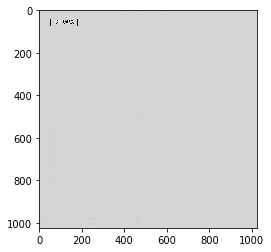

1


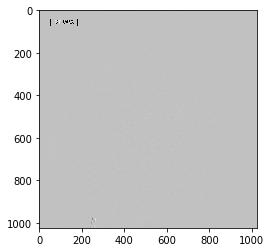

2


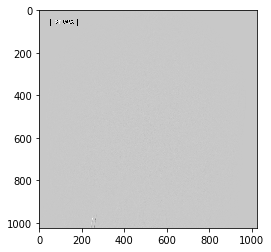

3


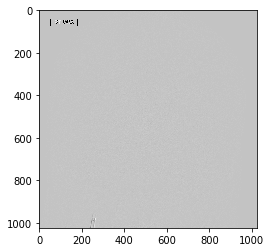

4


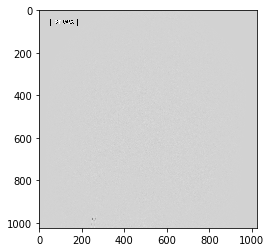

5


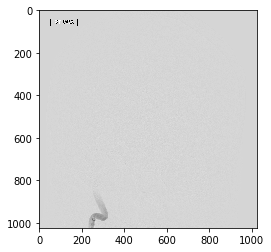

6


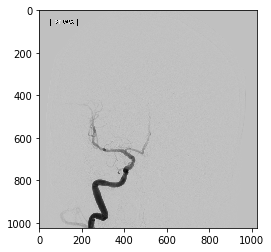

7


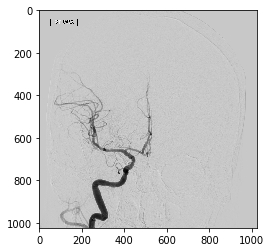

8


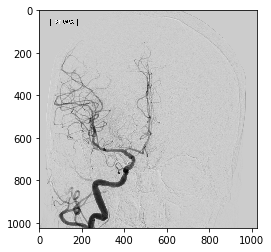

9


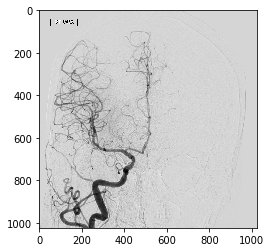

10


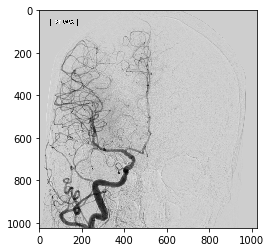

11


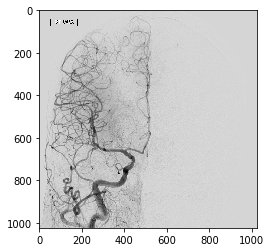

12


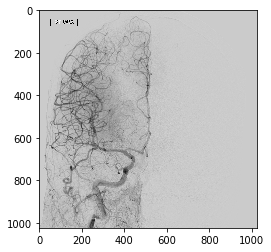

13


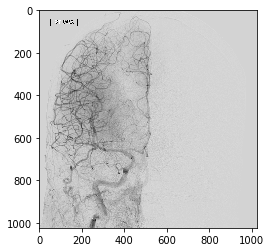

14


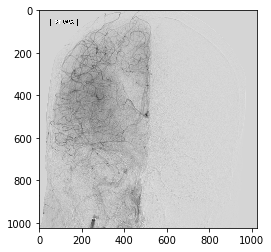

15


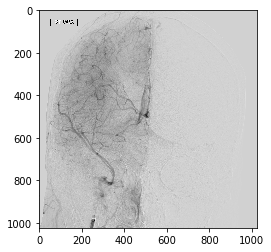

16


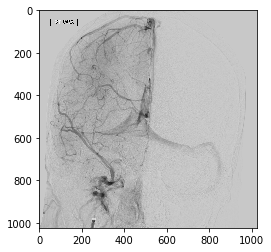

17


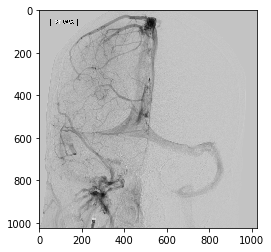

18


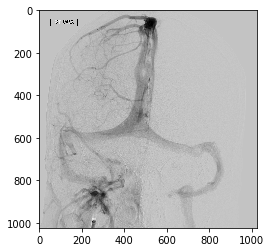

19


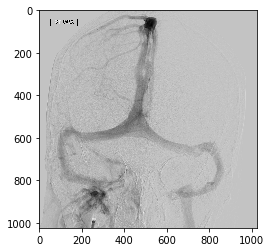

20


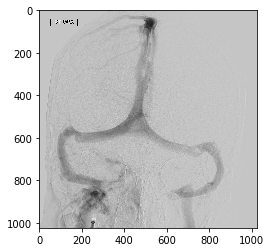

21


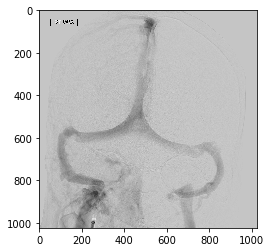

22


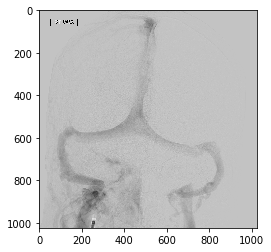

In [4]:
import pydicom
import imageio
import os
import numpy as np
import matplotlib.pyplot as plt

#Clot Retrieval
#Ir Angio Cerebral

# PERSONAL PATHS, COMMENT OUT EVERYONE ELSE'S
# path = 'gdrive/My Drive/CS168/' #calen
#path = 'gdrive/My Drive/UCLA/CS168/CS168/' #roslyn
path = 'gdrive/My Drive/CS168/' #evan

image_path = path + 'DSA_image_anonymized/0 - 247/Clot Retrievel/Cerebral 3 fps - 10/IM-0001-0010-0002.dcm'

dcm = pydicom.dcmread(image_path)
slices=dcm.pixel_array

print(slices.shape)
z,y,x=slices.shape

for i in range(z):
  print(i)
  plt.imshow(slices[i,:,:], cmap='gray')
  plt.show()


Determining Min (darker value) of every pixel over best frame ranges and saving PNG

9/15, 8-10
Best Original Frame


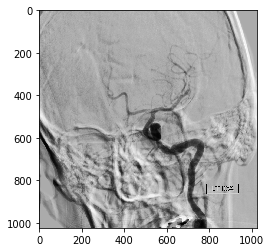

Combined Minimum


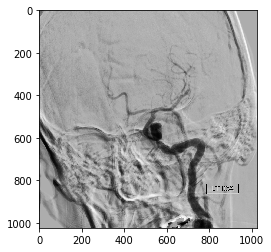

In [0]:
frame2=7
frame1=8
frame3=9


i=0
minimg=np.zeros([1,y,x])
for i in range(x):
  for j in range(y):
    minimg[0,j,i]=min(slices[frame1,j,i], slices[frame2,j,i])#, slices[frame3,j,i])

print(str(frame3) + '/' + str(z) + ', ' + str(frame1) + '-' + str(frame3+1))    
    
print('Best Original Frame')
plt.imshow(slices[frame1,:,:], cmap='gray')
plt.show()

print('Combined Minimum')
plt.imshow(minimg[0,:,:], cmap='gray')
plt.show()

minimscaled = (255.0 / minimg[0,:,:].max() * (minimg[0,:,:] - minimg[0,:,:].min())).astype(np.uint8)

imageio.imwrite(path + 'DSA Best PNGs/341_Post_Frontal.png', minimscaled)

